<a href="https://colab.research.google.com/github/pietraataulo/spotify-playlists/blob/main/spotify_playlists_ada_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎧 Explorando dados do Spotify

Aqui, vamos explorar dados extraídos da conta de um usuário do Spotify para entender um pouco do seu perfil e gosto musical. Trabalharemos com dois datasets:
1. **playlists_tracks**: contém a listagem de todas as suas playlists públicas e as músicas contidas nelas
> **Colunas:**
>
> `playlist_id`: ID da playlist
>
> `playlist_name`: nome da playlist
>
> `track_id`: ID da música
>
> `track_name`: nome da música
>
> `artist_names`: nomes dos artistas
>
> `album_name`: nome do álbum
>
> `album_release_date`: data de lançamento do álbum
>
> `popularity`: popularidade da música
>
> `duration_ms`: duração da música em milisegundos


2. **genres_artists**: contém a listagem de artistas presentes nas playlists e seus gêneros
> **Colunas:**
>
> `artist_name`: nome do artista
>
> `genres`: gêneros musicais

### Leitura e visão geral dos dados

In [ ]:
# Importação do Pandas
import pandas as pd

In [ ]:
# Leitura dos arquivos contendo os dados
playlists_tracks = pd.read_csv('playlists_tracks')
genres_artists = pd.read_csv('genres_artists')

In [ ]:
# Verificando a quantidade de linhas e colunas
playlists_tracks.shape

(8661, 10)

In [ ]:
genres_artists.shape

(934, 3)

In [ ]:
# Verificando as 5 primeiras linhas
playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866


In [ ]:
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [ ]:
# Verificando informações sobre as colunas (metadados e valores nulos)
playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


In [ ]:
genres_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   934 non-null    int64 
 1   artist_name  934 non-null    object
 2   genres       660 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.0+ KB


In [ ]:
# Verificando as 5 playlists com maior frequência de músicas
playlists_tracks["playlist_name"].value_counts().head(5)

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241


In [ ]:
# Verificando as medidas de posição e de dispersão (média, desvio padrão, mínimo, quartis e máximo)
playlists_tracks.describe()

,Unnamed: 0,popularity,duration_ms
count,8661.000000,8661.000000,8661.000000
mean,4340.874726,41.165108,228949.218451
std,2501.759314,28.636868,59203.878040
min,0.000000,0.000000,0.000000
25%,2176.000000,3.000000,192173.000000
50%,4341.000000,49.000000,221820.000000
75%,6506.000000,64.000000,255653.000000
max,8679.000000,91.000000,676776.000000


### Limpeza e transformações

Antes de analisarmos as playlists e os gêneros, vamos preparar nossos dados:
1. Extrair apenas o **ano** da data de lançamento dos álbuns  
2. Remover músicas com **nome ausente**  
3. Transformar a tabela de gêneros para que cada **gênero tenha uma linha própria**

1. Extrair o ano

In [ ]:
# Criando uma nova coluna para Anos ('album_release_year'), usando como base o recorte sobre a coluna de datas original ('album_release_year')
# Vale lembrar que é preciso transformar os dados da coluna em String, utilizando .str, para realizar o recorte
playlists_tracks['album_release_year'] = playlists_tracks['album_release_date'].str[0:4]
playlists_tracks.head(5)

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,2001
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,2021
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,2005
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,1987


In [ ]:
# Verificando as colunas, com a nova coluna criada
playlists_tracks.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_year'],
      dtype='object')

In [ ]:
# Convertendo a nova coluna 'album_release_year' para inteiro (int)
# O parâmetro errors='coerce' transforma os valores inválidos em NaN (nulo), evitando erro de execução
playlists_tracks['album_release_year'] = pd.to_numeric(playlists_tracks['album_release_year'], errors='coerce')
playlists_tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
 10  album_release_year  8661 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 744.4+ KB


In [ ]:
# Removendo a coluna 'album_release_date' pois não será mais utilizada
playlists_tracks = playlists_tracks.drop(columns=['album_release_date'])
playlists_tracks.head(5)


,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,popularity,duration_ms,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,79,313573,1992
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,85,210240,2001
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),83,331560,2021
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,82,167906,2005
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,53,224866,1987


2. Excluir linhas com track_name ausente

In [ ]:
# Excluindo linhas em que a coluna 'track_name' tenha dados faltantes, .copy serve para indicar que estamos criando uma cópia
playlists_tracks_clean = playlists_tracks.dropna(subset=['track_name']).copy()
playlists_tracks_clean.shape

(8659, 10)

3. Explodir os gêneros (1 linha por artista e gênero)

In [ ]:
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [ ]:
# Removendo linhas com valores nulos na coluna 'genres'
genres_artists = genres_artists.dropna(subset=['genres'])
genres_artists.shape

(660, 3)

In [ ]:
# Convertendo o tipo da coluna 'genres' de Series para Lista para ser possível "explodir" os dados
# fillna() garante que possíveis valores nulos não irão gerar erro com o split()
genres_artists['genres'] = genres_artists['genres'].fillna('').str.split(',')
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"[rap metal, rap rock, alternative metal, nu..."
1,1,System Of A Down,"[nu metal, metal, alternative metal, rap me..."
2,2,Metallica,"[metal, thrash metal, rock, heavy metal, h..."
3,3,Dead Kennedys,"[punk, hardcore punk, skate punk, proto-punk]"
4,4,The Hives,[garage rock]


In [ ]:
# Explodir os dados, de forma simplificada, é criar uma linha para cada atributo individual
genres_artists_exploded = genres_artists.explode('genres')

# Removendo espaços
genres_artists_exploded['genres'] = genres_artists_exploded['genres'].str.strip()

# Verificando a nova quantidade de linhas
genres_artists_exploded.shape

(1515, 3)

In [ ]:
# Verificando o dataset explodido
# Percebe-se que quanto mais linhas um artista possui, mais gêneros diversos ele toca
genres_artists_exploded.head(10)

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,rap metal
0,0,Rage Against The Machine,rap rock
0,0,Rage Against The Machine,alternative metal
0,0,Rage Against The Machine,nu metal
1,1,System Of A Down,nu metal
1,1,System Of A Down,metal
1,1,System Of A Down,alternative metal
1,1,System Of A Down,rap metal
1,1,System Of A Down,rock
2,2,Metallica,metal


In [ ]:
genres_artists_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1515 entries, 0 to 933
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1515 non-null   int64 
 1   artist_name  1515 non-null   object
 2   genres       1515 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.3+ KB


4. Explodir os artistas (1 linha por artista)
  > 🫂 Muitos artistas gostam de criar músicas em conjunto com outros artistas, mas para essa análise isso não será tão interessante.
  >
  > 💥 Aqui faremos o mesmo processo anterior, mas dessa vez "explodiremos" os **artistas** (não literalmente)
  >
  > 🔍 Assim, será possível fazer uma análise mais precisa de cada um.



In [ ]:
playlists_tracks_clean.shape

(8659, 10)

In [ ]:
playlists_tracks_clean['artist_names'] = playlists_tracks_clean['artist_names'].fillna('').str.split(',')
playlists_tracks_clean.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,popularity,duration_ms,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,[Rage Against The Machine],Rage Against The Machine - XX (20th Anniversar...,79,313573,1992
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,[System Of A Down],Toxicity,85,210240,2001
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,[Metallica],Metallica (Remastered Deluxe Box Set),83,331560,2021
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,[System Of A Down],Hypnotize,82,167906,2005
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,[Dead Kennedys],Give Me Convenience or Give Me Death,53,224866,1987


In [ ]:
# É importante salvar o dataset explodido em outro espaço reservado por se tratar de uma grande mudança
playlists_tracks_exploded = playlists_tracks_clean.explode('artist_names')
playlists_tracks_exploded['artist_names'] = playlists_tracks_exploded['artist_names'].str.strip() # Removendo espaços
playlists_tracks_exploded.shape

(10143, 10)

In [ ]:
playlists_tracks_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10143 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10143 non-null  int64 
 1   playlist_id         10143 non-null  object
 2   playlist_name       10143 non-null  object
 3   track_id            10143 non-null  object
 4   track_name          10143 non-null  object
 5   artist_names        10143 non-null  object
 6   album_name          10143 non-null  object
 7   popularity          10143 non-null  int64 
 8   duration_ms         10143 non-null  int64 
 9   album_release_year  10143 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 871.7+ KB


## Visualização com Matplotlib

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExazlycDZvOXZzbXN1Z2djZzZ3cnU0M3FkeXdnbzJxMGdjbmpsZGVseSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/iRIf7MAdvOIbdxK4rR/giphy.gif" width="300">

Agora que os dados estão limpos, vamos responder algumas perguntas com gráficos.

In [ ]:
# Importação de bibliotecas para criação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Aplicando um estilo padrão nos gráficos
plt.style.use('seaborn-v0_8')

### Quais playlists têm mais músicas?

In [ ]:
# Contando a frequência de músicas em cada playlist, selecionando as 5 primeiras com mais músicas e
# ordenando as playlists para que fiquem em ordem decrescente no gráfico
playlist_counts = playlists_tracks_clean['playlist_name'].value_counts().head(5).sort_values()
playlist_counts

,count
playlist_name,
Radio em '00,241
tudo misturado curtindo uma chuva,261
cantando feat. rebolando,274
Rockzim pra cantar junto,300
Caminhando sem padrão nenhum,311


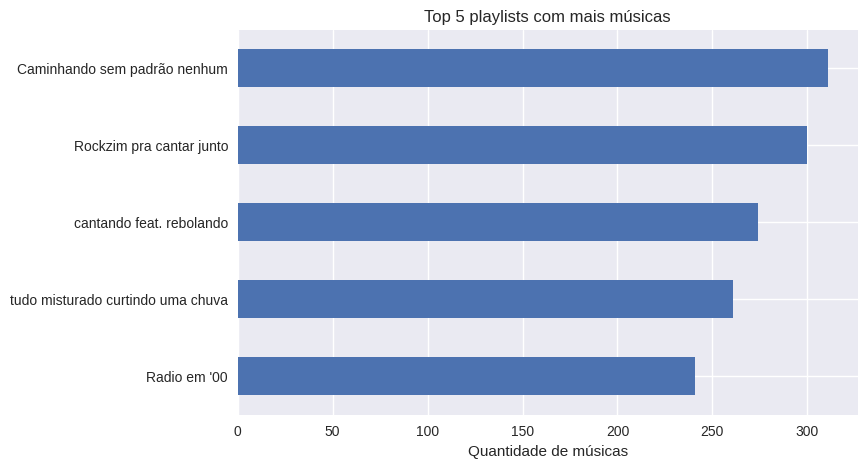

In [ ]:
# Plotando um gráfico de barras horizontais, figsize ajusta o tamanho da figura
playlist_counts.plot(kind="barh", figsize=(8,5))
plt.ylabel("")
plt.xlabel("Quantidade de músicas")
plt.title("Top 5 playlists com mais músicas")
plt.show()

> A playlist "**Caminhando sem padrão nenhum**" possui a maior **quantidade de músicas** entre as playlists do dataset.

### Como evolui a quantidade de músicas lançadas por ano nas playlists?

In [ ]:
# Contando a frequência de músicas por cada ano e ordenando-os
songs_per_year = (
    playlists_tracks_clean['album_release_year']
    .value_counts()
    .sort_index()
)
songs_per_year

,count
album_release_year,
1957,6
1958,1
1960,7
1961,1
1963,9
...,...
2021,359
2022,168
2023,110


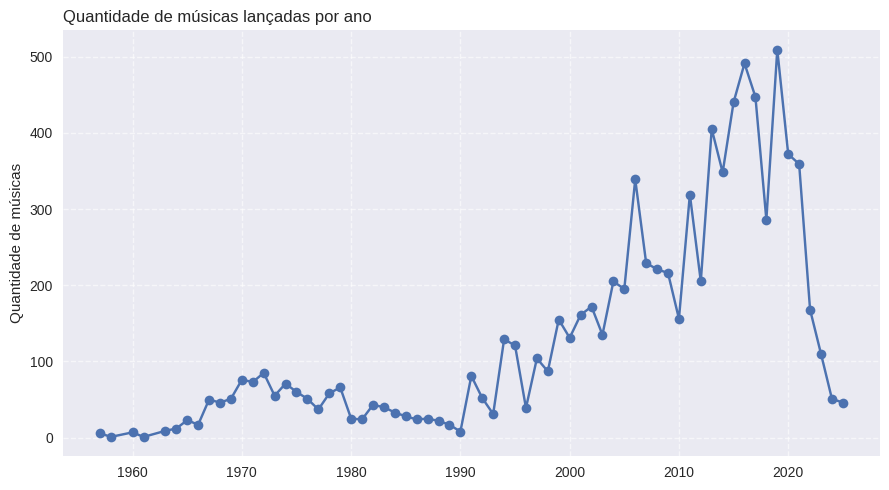

In [ ]:
# Plotando um gráfico de linha
songs_per_year.plot(kind="line", marker="o", figsize=(9,5))

plt.title("Quantidade de músicas lançadas por ano", loc='left')
plt.xlabel("")
plt.ylabel("Quantidade de músicas")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

> A partir dos anos 90, a criação de músicas **aumentou** significativamente
>> É possível notar também que ouve uma **queda** em 2020

### Quais são os artistas com maior popularidade média?

In [ ]:
# Usamos o método groupby para agrupar os artistas com suas respectivas popularidades médias
# Então, ordenamos para selecionar os 5 mais populares
# Finalmente ordenamos novamente para que o gráfico apresente os dados de maneira decrescente
popular_artists = playlists_tracks_exploded.groupby('artist_names')['popularity'].mean().sort_values(ascending=False).head(5).sort_values()
popular_artists

,popularity
artist_names,
a-ha,86.000000
sombr,88.000000
Bad Bunny,88.333333
Fleetwood Mac,89.000000
The Neighbourhood,91.000000


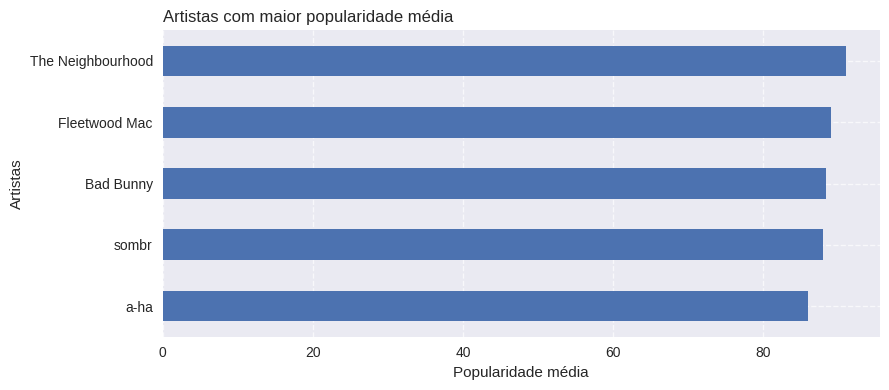

In [ ]:
# Plotando um gráfico de barras horizontais
popular_artists.plot(kind="barh", figsize=(9,4))

plt.title("Artistas com maior popularidade média", loc='left')
plt.xlabel("Popularidade média")
plt.ylabel("Artistas")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> O artista mais popular do dataset é a banda **The Neighbourhood**
>> 😆 Quem nunca ouviu aquela música *Sweet Weather*?

### Quais são os artistas mais frequentes nas playlists?

In [ ]:
# Calculando a frequência dos artistas nas playlists e selecionando os 10 primeiros
artists_counts = playlists_tracks_exploded['artist_names'].value_counts().head(10).sort_values()
artists_counts.head(10)

,count
artist_names,
Terno Rei,88
Kings of Leon,100
Cage The Elephant,103
The Strokes,119
Red Hot Chili Peppers,124
Arctic Monkeys,138
Oasis,160
Jungle,161
Olivia Dean,161


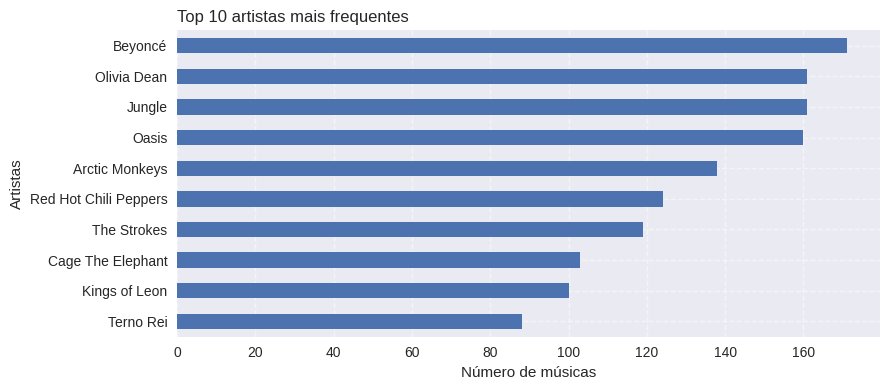

In [ ]:
# Plotando um gráfico de barras horizontais
artists_counts.plot(kind="barh", figsize=(9,4))

plt.title("Top 10 artistas mais frequentes", loc='left')
plt.xlabel("Número de músicas")
plt.ylabel("Artistas")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> Esse usuário do Spotify realmente gosta da **Beyoncé**, aparecendo **constantemente** nas playlists

### Quais gêneros são mais frequentes entre os artistas das playlists?

In [ ]:
# Verificando as colunas do dataset explodido de gêneros
genres_artists_exploded.columns

Index(['Unnamed: 0', 'artist_name', 'genres'], dtype='object')

In [ ]:
# Contando a frequência de cada gênero, selecionando os 10 primeiros e ordenando
freq_genres = genres_artists_exploded['genres'].value_counts().head(10).sort_values()
freq_genres

,count
genres,
bossa nova,25
forró,26
axé,28
rock,30
pagode,38
brazilian pop,43
brazilian rock,51
samba,67
nova mpb,80


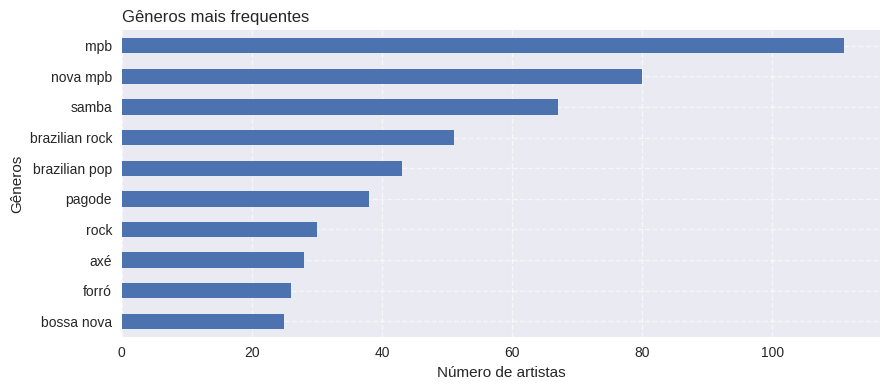

In [ ]:
# Plotando um gráfico de barras horizontais
freq_genres.plot(kind="barh", figsize=(9,4))

plt.title("Gêneros mais frequentes", loc='left')
plt.xlabel("Número de artistas")
plt.ylabel("Gêneros")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

> **MPB** é o gênero musical que mais aparece entre os artistas das playlists

### Qual é a duração média das músicas por playlist?

In [ ]:
# Agrupando as playlists por duração média das músicas
# Dividindo por 60000 para transformar em minutos
# Por fim, arredondando o valor para 2 casas decimais
playlists_mean_duration = round(playlists_tracks_clean.groupby('playlist_name')['duration_ms'].mean() / 60000, 2)

# Ordenando as playlists por duração, selecionando as 10 com músicas mais longas
sorted_playlists_duration = playlists_mean_duration.sort_values(ascending=False).head(10).sort_values()
sorted_playlists_duration

,duration_ms
playlist_name,
ouvir tomando chá ou no frio,4.12
JOHN AO VIVAO,4.13
Bom dia com sol em Beyoncé,4.14
Cantando com emoção,4.20
Bold,4.26
Climinha de presencial,4.27
Os classicão tudo,4.44
De olho fechado é tudo OASIS,4.51
Músicas de ouvir 2x pra aproveitar direito,4.53


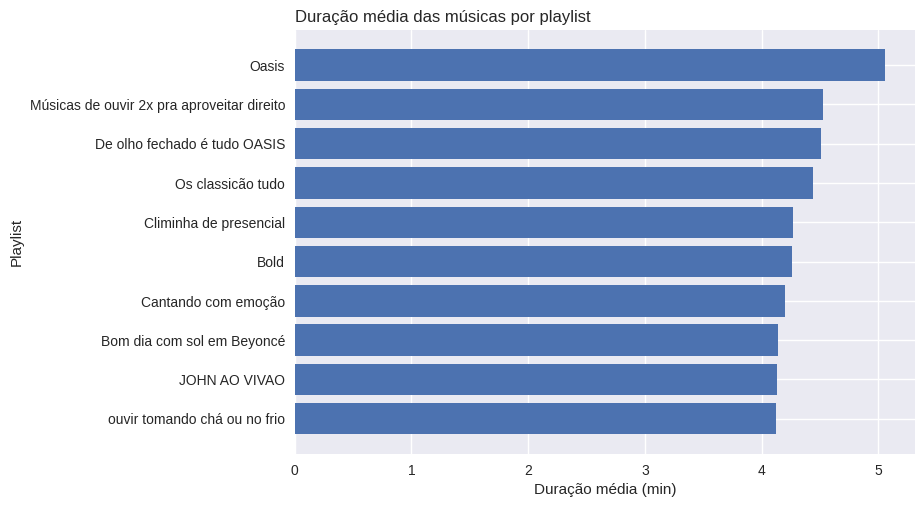

In [ ]:
# Plotando um gráfico de barras horizontais
plt.barh(sorted_playlists_duration.index, sorted_playlists_duration.values)
plt.ylabel("Playlist")
plt.xlabel("Duração média (min)")
plt.title("Duração média das músicas por playlist", loc='left')
plt.show()

> **Oasis** é a playlist com músicas mais **longas**

### Existe relação entre o ano de lançamento e a duração média das músicas?

In [ ]:
# Agrupando o ano de lançamento da música por duração média e transformando em minutos
# Utilizei mediana por ser um valor mais preciso
duration_per_year = round(playlists_tracks_clean.groupby('album_release_year')['duration_ms'].median() / 60000, 2)
duration_per_year

,duration_ms
album_release_year,
1957,2.86
1958,2.63
1960,3.04
1961,3.04
1963,2.76
...,...
2021,3.32
2022,3.47
2023,3.35


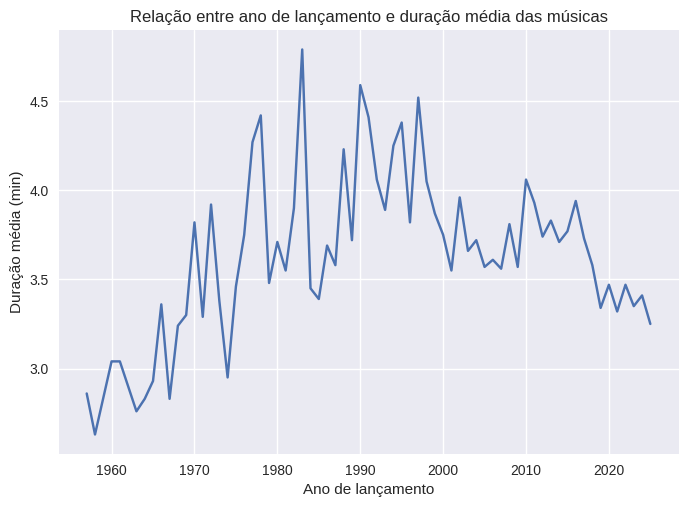

In [ ]:
# Plotando um gráfico de linha
plt.plot(duration_per_year.index, duration_per_year.values)
plt.xlabel("Ano de lançamento")
plt.ylabel("Duração média (min)")
plt.title("Relação entre ano de lançamento e duração média das músicas")
plt.show()

> É possível notar que a duração média das músicas **aumentou gradualmente** conforme os anos, tendo diversos picos
>> E a partir de 2015, começou a **diminuir**

### Quão diversa em gêneros é cada playlist?
Em outras palavras, quais playlists têm mais gêneros distintos entre os artistas que aparecem nelas?

In [ ]:
# Verificando as colunas do dataframe
playlists_tracks_clean.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'popularity', 'duration_ms',
       'album_release_year'],
      dtype='object')

In [ ]:
genres_artists_exploded.columns

Index(['Unnamed: 0', 'artist_name', 'genres'], dtype='object')

In [ ]:
# Juntando os Dataframes pela coluna em comum (artist_names)
# Como estão com nomes diferentes, é necessário especificar a junção
complete_df = playlists_tracks.merge(
    genres_artists_exploded,
    left_on='artist_names',
    right_on='artist_name',
    how='left'
)

In [ ]:
# Agrupando as playlists por valores únicos de gêneros
# Ordenando-as e selecionando as 10 primeiras com mais gêneros diversos
genre_per_playlist = (
    complete_df.groupby('playlist_name')['genres']
    .nunique(dropna=True)
    .sort_values(ascending=False)
    .head(10)
    .sort_values()
)

genre_per_playlist

,genres
playlist_name,
Rockzim pra cantar junto,48
tudo misturado curtindo uma chuva,49
serotonina pra trabalhar,49
Só ~good vibe~,52
Cervejinha suave,53
Bom dia minha esquerdista,57
Os classicão tudo,58
Aquela jantinha,62
Toda zoë kravitz energy,79


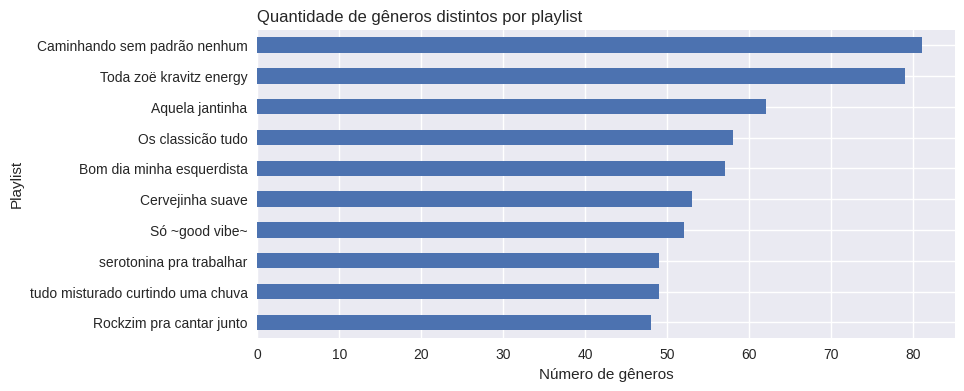

In [ ]:
# Plotando um gráfico de barras horizontais
genre_per_playlist.plot(kind="barh", figsize=(9,4))
plt.ylabel("Playlist")
plt.xlabel("Número de gêneros")
plt.title("Quantidade de gêneros distintos por playlist", loc='left')
plt.show()

> A playlist **Caminhando sem padrão nenhum** possui a maior quantidade de gêneros diversos

---

<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmxwajYzcWh3NmRhNjN0N2plMDV5ZGdrcHQ0ZnlqeW55bTd6NjdnYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lD76yTC5zxZPG/giphy.gif" width="300">